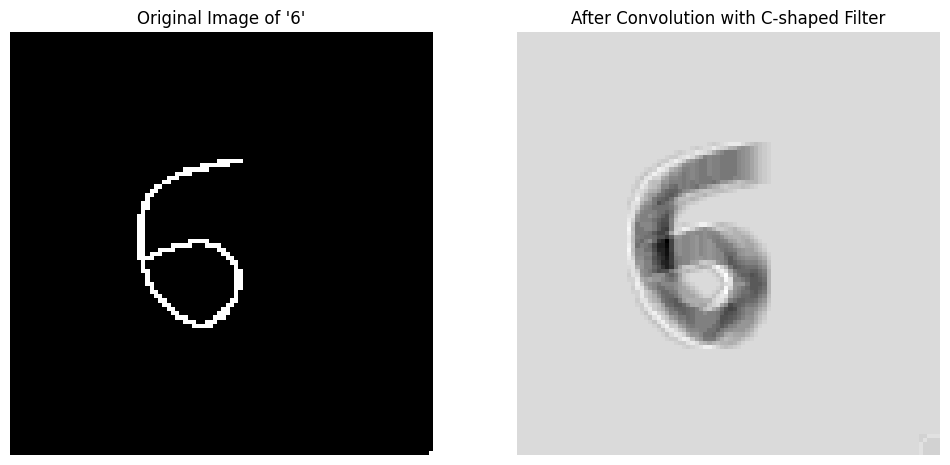

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

# Load an image of '6' (ensure it's a black background with a white number)
image_path = "6 in Background (1).png"  # Replace with actual path
image = Image.open(image_path).convert("L")  # Convert to grayscale
image = np.array(image) / 255.0  # Normalize to [0,1]

# Convert the white '6' to 1 and black background to -1
image = np.where(image > 0.5, 1, -1)

# Define the 10x10 C-shaped filter (Kernel)
c_shape_filter = np.array([
    [-1, -1,  1,  1,  1,  1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1,  1,  1,  1,  1, -1, -1, -1, -1]
])

# Apply convolution
convolved_output = convolve2d(image, c_shape_filter, mode='same', boundary='fill', fillvalue=-1)

# Display the original image and the convolved output
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap='gray', interpolation='nearest')
ax[0].set_title("Original Image of '6'")
ax[0].axis('off')

ax[1].imshow(convolved_output, cmap='gray', interpolation='nearest')
ax[1].set_title("After Convolution with C-shaped Filter")
ax[1].axis('off')

plt.show()